# Simple chaotic behavior in non-linear systems

In the last lecture, we discussed how floating point arithmetic can be subtle: its finite precision leads to the fact that even simple properties of elementary arithmetic, like the associativity of addition, don't hold:

In [12]:
a, b, c = 1.0, 1e-16, 1.2222e-16
print(f"(a + b) + c = {(a + b) + c}")
print(f"a + (b + c) = {a + (b + c)}")

(a + b) + c = 1.0000000000000002
a + (b + c) = 1.0000000000000002


This behavior can have serious implications in a variety of numerical work scenarios. 

Consider the seemingly trivial problem of evaluating with a computer the
expression

$$f(x) = r x (1-x)$$

where $r$ and $x$ are real numbers with $r \in [0,4]$ and $x \in (0,1)$.
This expression can also be written in an algebraically equivalent form:

$$f_2(x) = rx - rx^2.$$

We will see, however, that when using a computer these two forms don't
necessarily produce the same answer. Computers can not represent the
real numbers (a mathematical abstraction with infinite precision) but
instead must use finite-precision numbers that can fit in finite memory.
The two expressions above can, therefore, lead to slightly different
answers as the various (algebraically equivalent) operations are carried
by the computer.

First a look at a few simple tests:

In [15]:
def f1(x): return r*x*(1-x)
def f2(x): return r*x - r*x**2

r = 0.5
x = 0.8
print('f1:', f1(x))
print('f2:', f2(x))

f1: 0.07999999999999999
f2: 0.07999999999999996


In [16]:
r = 3.9
x = 0.8
print('f1:', f1(x))
print('f2:', f2(x))

f1: 0.6239999999999999
f2: 0.6239999999999997


The difference is small but not zero:

In [17]:
print('difference:', (f1(x)-f2(x)))

difference: 2.220446049250313e-16


More importantly, this difference begins to accumulate as we perform the
same operations over and over. Let's illustrate this behavior by using
the formulas above *iteratively*, that is, by feeding the result of the
evaluation back into the same formula:

$$x_{n+1} = f(x_n), n=0,1, \ldots$$

We can experiment with different values of $r$ and different starting
points $x_0$ to observe the different results. We will simply build a
python list that contains the results of three different (algebraically
equivalent) forms of evaluating the above expression.

<div class="admonition">

<p class="admonition-title">Exercise</p>

<p>Build a little script that computes the iteration of $f(x)$ using three different ways of writing the expression. Store your results and plot them using the `plt.plot()` function (the solution follows).</p>

</div>

For completeness, we define three algebraically equivalent formulations:

In [18]:
def f1(x): return r*x*(1-x)
def f2(x): return r*x - r*x**2
def f3(x): return r*(x-x**2)

In order to see the difference between the initial behavior and the
later evolution, let's declare two variables to control our plotting:

In [31]:
num_points = 100  # total number of points to compute
drop_points = 50  # don't display the first drop_points

Using these, we can get the following figure:

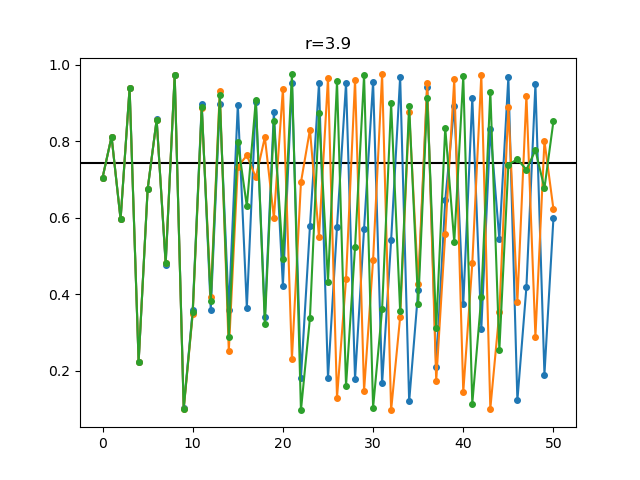

In [33]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

x0 = 0.55 # Any starting value
r  = 3.9  # Change this to see changes in behavior
fp = (r-1.0)/r
x1 = x2 = x3 = x0
data = []
data.append([x1,x2,x3])
for i in range(num_points):
    x1 = f1(x1)
    x2 = f2(x2)
    x3 = f3(x3)
    data.append([x1,x2,x3])

# Display the results
plt.figure()
plt.title('r=%1.1f' % r)
plt.axhline(fp, color='black')
plt.plot(data[drop_points:], '-o', markersize=4)
plt.show()

:::{note}Exercise

Now, experiment with different values of $r$ as well as different
starting points $x_0$. What do you see? What happens when $r$ is small
(close to 0)? Experiment with these values of $r$: \[1.9, 2.9, 3.1, 3.5,
3.9\] and think about the behavior of the system as you change $r$.

Once we've understood the basic pattern, let's try to think of the
entire evolution of the system *as a function of* $r$. First, observe
that a sequence generated by an iterative process of the form

$$x_{n+1} = f(x_n), n=0,1, \ldots$$

will stop producing new values if there is a certain $x^*$ such that

$$x^* = f(x^*).$$

This special $x^*$ is called a *fixed point* of the iterative process.
It is easy to show that for our $f(x)$, the fixed point is

$$x^* = \frac{r-1}{r}$$

(in fact, that's the value plotted as a thin black line in the earlier
script).
:::

:::{note}Exercise

<p>Study whether the iteration converges to the fixed point or not by
letting it run for each value of r for a few hundred points and
discarding those, and then plotting the rest. Make a diagram with these
plots as a function of r.</p>
</div>

The following code is a simple solution:
:::

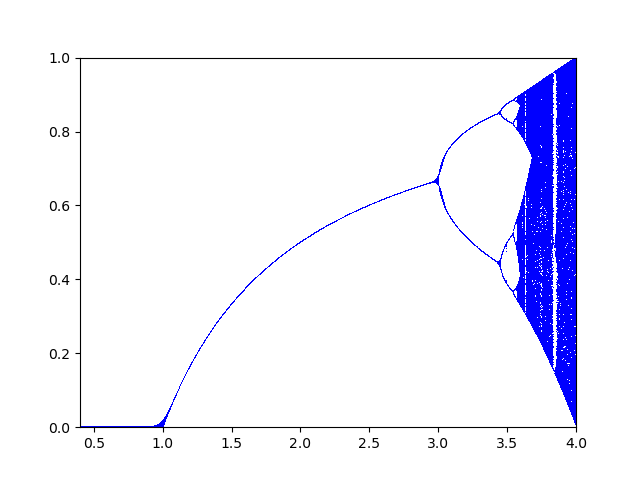

In [29]:
def f(x, r):
    #return r*x*(1-x)
    return r*x -r*x**2

num_points = 500
drop_points = 50
rmin, rmax = .4, 4
xmin, xmax = 0, 1
x0 = 0.65
fig, ax = plt.subplots()
ax.set_xlim(rmin, rmax)
ax.set_ylim(xmin, xmax)
for r in np.linspace(rmin, rmax, 2000):
    x = np.empty(num_points)
    x[0] = x0
    for n in range(1, num_points):
        x[n] = f(x[n-1], r)
    x = x[drop_points:]
    rplot = r*np.ones_like(x)
    ax.plot(rplot, x, 'b,')

plt.show()

:::{note} Exercise

Can you relate the features of this figure to the behavior you saw in
your earlier plots? Zoom in the region past $r=3$, what finer features
do you see? Where is the fixed point we discussed earlier?